In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import log10
%matplotlib inline
start_time = pd.datetime.now()

In [2]:
mydata = pd.read_excel('card transactions.xlsx', converters={'Merchnum': lambda x: str(x)})
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [3]:
mydata.count() * 100 / len(mydata)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [4]:
mydata.shape

(96753, 10)

In [4]:
mydata.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [5]:
mydata.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2010-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [6]:
mydata.describe(include = 'all')

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,93378,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13091,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2010-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [7]:
numrecords = len(mydata)
print(numrecords)

96753


In [8]:
mydata.count() * 100 /numrecords

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum              96.511736
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
dtype: float64

In [59]:
mydata['Cardnum'].value_counts().head(10)

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
5142187452     526
5142299634     515
5142189945     512
5142149691     497
5142190147     488
Name: Cardnum, dtype: int64

In [18]:
len(mydata['Recnum'].unique())

96753

In [10]:
len(mydata['Cardnum'].unique())

1645

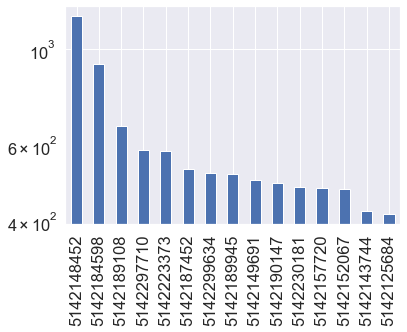

In [10]:
sns.set(font_scale=1.5)
mydata['Cardnum'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [12]:
len(mydata['Date'].unique())

365

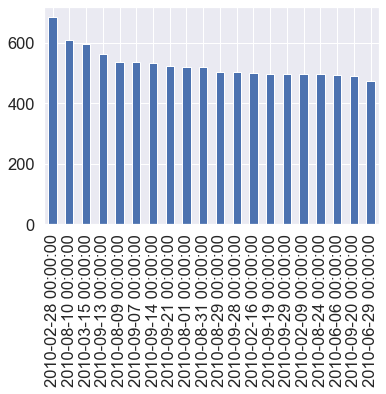

In [13]:
mydata['Date'].value_counts().head(20).plot(kind = 'bar')

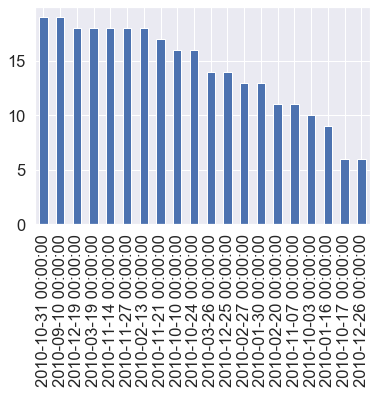

In [14]:
mydata['Date'].value_counts().tail(20).plot(kind='bar')

In [15]:
count_day = mydata.groupby('Date').count()
count_day.head(20)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2010-01-01,51,51,51,51,51,51,51,51,51
2010-01-02,29,29,29,29,29,10,29,29,29
2010-01-03,159,159,153,159,157,153,159,159,159
2010-01-04,229,229,221,229,226,221,229,229,229
2010-01-05,309,309,286,309,299,297,309,309,309
2010-01-06,330,330,317,330,328,321,330,330,330
2010-01-07,307,307,292,307,305,294,307,307,307
2010-01-08,104,104,104,104,104,104,104,104,104
2010-01-09,19,19,19,19,19,19,19,19,19


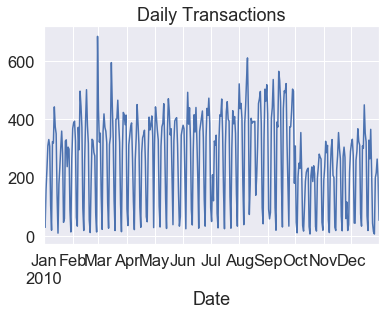

In [16]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 1))\
    .count().trx.plot(title = 'Daily Transactions')

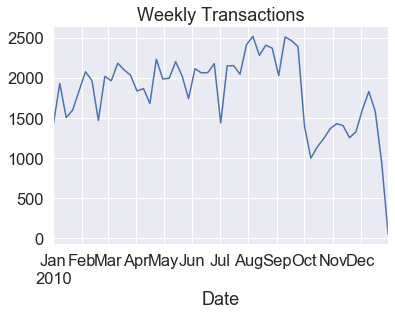

In [17]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 7))\
    .count().trx.plot(title = 'Weekly Transactions')

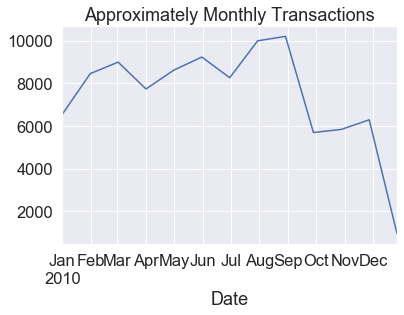

In [18]:
mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date']).resample(dt.timedelta(days = 30))\
    .count().trx.plot(title = 'Approximately Monthly Transactions')

In [19]:
len(mydata['Merchnum'].unique())

13092

In [20]:
mydata['Merchnum'].value_counts().head(10)

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
602608969138      783
Name: Merchnum, dtype: int64

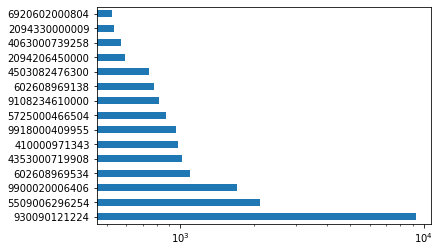

In [121]:
mydata['Merchnum'].value_counts().head(15).plot(kind = 'barh')
plt.xscale('log')

In [22]:
len(mydata['Merch description'].unique())

13126

In [23]:
mydata['Merch description'].value_counts()

GSA-FSS-ADV                  1688
SIGMA-ALDRICH                1635
STAPLES #941                 1174
FISHER SCI ATL               1093
MWI*MICRO WAREHOUSE           958
CDW*GOVERNMENT INC            872
DELL MARKETING L.P.           816
FISHER SCI CHI                783
AMAZON.COM  *SUPERSTOR        750
OFFICE DEPOT #1082            748
VWR SCIENTIFIC PROD VCTS      688
PC *PC CONNECTION             570
C & C PRODUCT SERVICES        558
BUY.COM                       481
FISHER SCI HUS                442
GSA/CUST SUPPLY CTR 97        435
LAB SAFETY SUPPLY, INC        431
PROFESS OFC ENTERPRISES       421
FRANKLIN COVEY COMPANY        418
STAPLES NATIONAL #471         417
GLOBAL COMPUTER SUPPLY        410
A DAIGER AND CO INC           392
RETAIL CREDIT ADJUSTMENT      383
GOVERNMENT SCIENTIFIC SOU     362
LABSOURCE INC                 346
COLE PARMER INSTRUMENT        341
MC MASTER CARR SUPP           311
GTSI                          309
RETAIL DEBIT ADJUSTMENT       308
THE LIGHTHOUSE

In [24]:
len(mydata['Merch state'].unique())

228

In [25]:
mydata['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
GA      5025
PA      4899
NJ      3912
TX      3790
NC      3322
WA      3300
DC      3208
OH      3131
NY      2430
MO      2420
FL      2143
MA      2081
MI      2033
CO      1987
OR      1510
KS      1236
WI       953
CT       952
MN       939
UT       939
NH       908
NV       726
KY       520
RI       467
OK       411
       ...  
505        1
147        1
718        1
016        1
171        1
276        1
051        1
497        1
870        1
579        1
841        1
874        1
776        1
470        1
820        1
380        1
391        1
494        1
663        1
387        1
107        1
952        1
537        1
357        1
245        1
097        1
167        1
432        1
334        1
580        1
Name: Merch state, Length: 227, dtype: int64

In [26]:
len(mydata['Merch zip'].unique())

4568

In [28]:
mydata['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

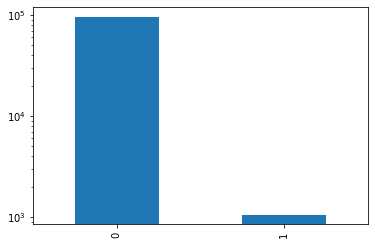

In [148]:
mydata['Fraud'].value_counts().plot(kind='bar',legend=None)
plt.yscale('log')

C:\Users\rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0.5, 0, '')

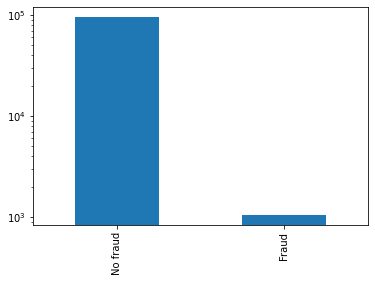

In [151]:
df = pd.DataFrame({'Fraud': ['No fraud','Fraud'], 'Values': [95338, 1059]})
df.plot(x='Fraud',y='Values',kind='bar',legend=None)
plt.yscale('log')
plt.axes().axes.get_xaxis().set_label_text('')

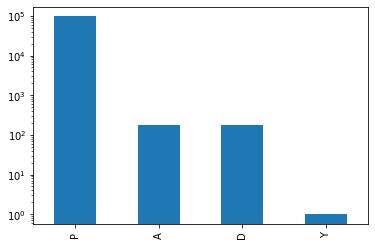

In [118]:
mydata['Transtype'].value_counts().plot(kind='bar')
plt.yscale('log')

In [29]:
mydata['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
30.00       317
3.85        271
100.00      252
75.00       243
6.62        219
19.95       210
150.00      208
50.00       205
99.00       200
300.00      196
200.00      193
350.00      178
250.00      171
25.00       171
8.31        164
60.00       159
295.00      158
35.00       157
2500.00     157
195.00      156
500.00      149
20.00       147
199.00      146
3.57        136
125.00      135
           ... 
2386.84       1
275.03        1
956.37        1
58.84         1
4690.00       1
480.74        1
14.43         1
76.34         1
484.82        1
76.01         1
2127.85       1
2365.35       1
305.96        1
607.60        1
221.95        1
518.80        1
412.83        1
47.28         1
169.19        1
675.24        1
2481.44       1
1073.80       1
608.62        1
497.69        1
76.66         1
201.09        1
1394.50       1
197.73        1
282.93        1
120.67        1
Name: Amount, Length: 34

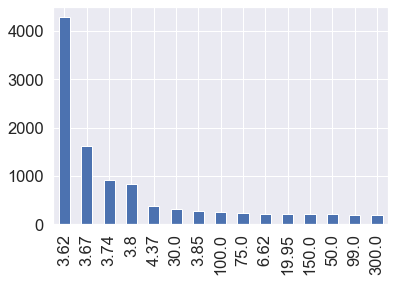

In [30]:
mydata['Amount'].value_counts().head(15).plot(kind = 'bar')

(0.1, 171768.2728626341)

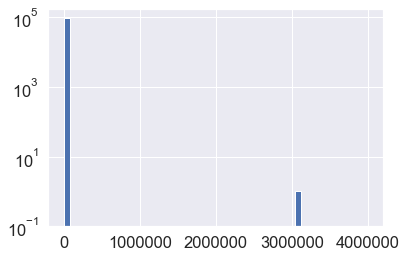

In [31]:
plt.hist(mydata['Amount'],bins=50,range=[0,4000000])
plt.yscale('log')
plt.ylim(bottom = .1)

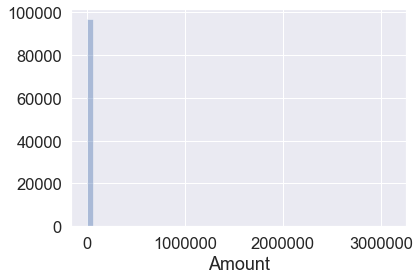

In [32]:
sns.distplot(mydata['Amount'],kde=False)

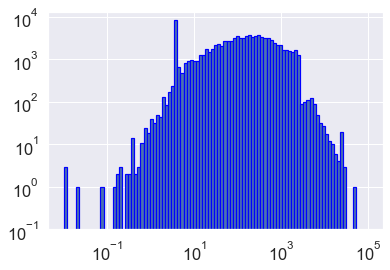

In [33]:
plt.hist(mydata['Amount'],bins=np.logspace(np.log10(.01),np.log10(100000), 100),
         range=[.1,100000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.xscale('log')
plt.savefig('log normal distribution')

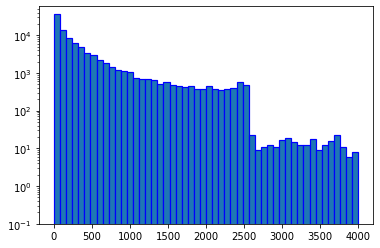

In [12]:
plt.hist(mydata['Amount'],bins=50,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.savefig('good distribution')

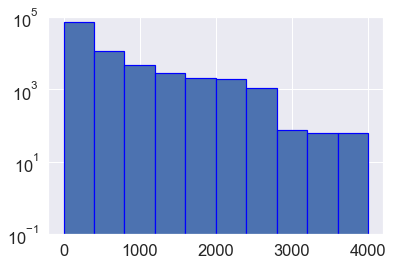

In [35]:
plt.hist(mydata['Amount'],bins=10,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.savefig('too few bins')

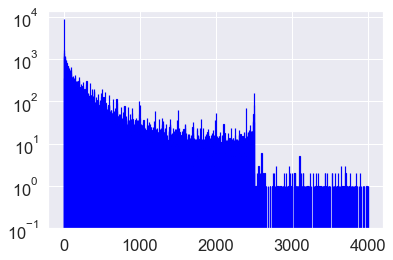

In [36]:
plt.hist(mydata['Amount'],bins=2000,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = .1)
plt.savefig('too many bins')

In [37]:
mydata['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

In [124]:
temp = mydata[mydata['Transtype'] == 'P']
trans = temp[temp['Amount'] <= 1000000]
trans = trans.reset_index(drop=True)
trans.shape

(96397, 10)

In [125]:
goods = trans[trans['Fraud'] == 0]
bads = trans[trans['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95338     #bads: 1059


In [127]:
goods.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [128]:
overall_fraud_rate = len(bads) / len(trans)
print(overall_fraud_rate)

0.010985819060759152


AttributeError: 'Rectangle' object has no property 'normed'

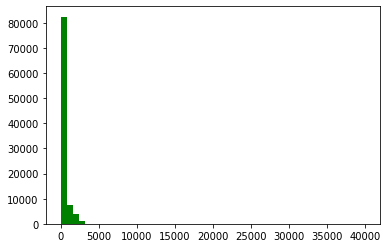

In [129]:
plt.hist(goods['Amount'],bins=50,range=[0,40000], normed = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,40000], normed = True, color = 'red', alpha = .5)
plt.yscale('log')
# plt.ylim(bottom = .1)

AttributeError: 'Rectangle' object has no property 'normed'

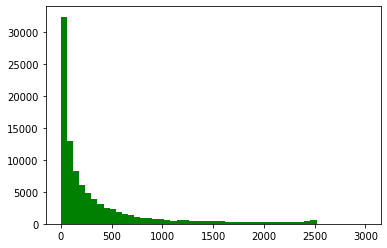

In [131]:
plt.hist(goods['Amount'],bins=50,range=[0,3000], normed = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,3000], normed = True, color = 'red', alpha = .5)
plt.yscale('log')
# plt.ylim(bottom = .1)

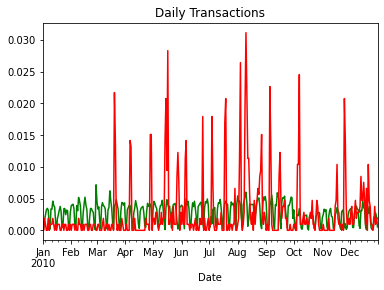

In [133]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

Text(0, 0.5, '% of total records in that particular fraud_label')

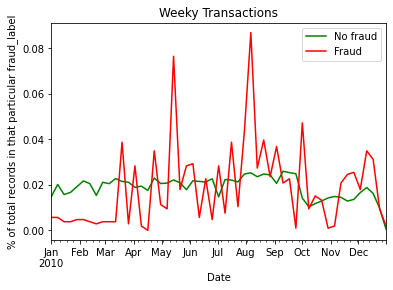

In [135]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Transactions', color = 'green', label = 'No fraud')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red', label = 'Fraud')
plt.legend()
plt.ylabel("% of total records in that particular fraud_label")

Text(0, 0.5, '% of total records in that particular fraud_label')

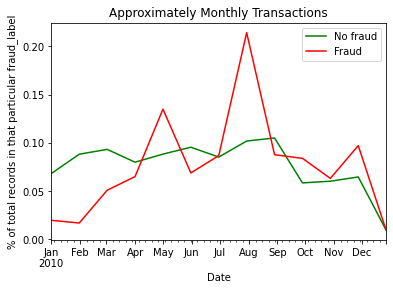

In [136]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 30)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Approximately Monthly Transactions', color = 'green', label = 'No fraud')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 30)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red', label = 'Fraud')
plt.legend()
plt.ylabel("% of total records in that particular fraud_label")

In [47]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(mydata)
profile.to_file('Data Summary.html')

In [48]:
stop_time = pd.datetime.now()
print('start: ', start_time)
print('stop: ',stop_time)
print('duration: ', stop_time - start_time)

start:  2020-03-11 15:11:24.941512
stop:  2020-03-11 15:11:59.924838
duration:  0:00:34.983326
